# Classification Model 2: Decision Tree

***
### Loading Dataset

In [22]:
# Import necessary Python libraries here ...
# ...
# ...
# ...

# Loading the dataset from the /data folder here 
data_path  = ?

# Read your csv file here ...
currentdf  = ???

# Allocate your training data and label 
x = ?
y = ?

# Splitting dataset into 75% for training and 25% for testing here ...
# ...
# ...

# Display the features and label from the training set 
print(?)
print(?)

# Insert code to standardize your dataset here ...
# ...
# ...


     index_col       avC         avP       sdC         sdP          avR  maxC  \
432          3  3.595600  792.930000  3.332669  786.913383   399.232039  7.23   
22           9  1.616815  329.370370  2.485054  583.668067   637.157143  1.76   
620         14  1.305465  254.702326  2.232888  529.072646   604.123431  0.66   
963          0  0.284667   34.533333  0.227744   33.000244  1429.358887  0.77   
188          9  1.484593  298.003704  2.357156  558.706609   623.840883  1.84   
..         ...       ...         ...       ...         ...          ...   ...   
360         21  0.906095  167.071429  1.721403  405.103331   871.333092  0.09   
466         15  1.292000  256.215556  2.277856  534.821437   658.162380  1.30   
299          0  2.612000  574.333333  3.216506  759.213038   753.064179  7.25   
493         20  1.080317  202.135000  1.919027  450.266332   678.029294  2.49   
527          9  1.641481  339.711111  2.584596  619.005346   585.429776  0.59   

     maxP     stdCR       s

## Building a Decision Tree Model

Let's train a model using the selected features extracted earlier and set the 'max_depth' parameter to 3.


In [23]:
from sklearn.tree import DecisionTreeClassifier
class_tree = DecisionTreeClassifier(max_depth=??) 
class_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

We vistualize the classification tree by importing 'export_graphviz', which exports the decision tree in a file with DOT format. This function generates a GraphiViz representation of the decision tree, which is then written into 'out_file'. Lasty, the image function is used to display the tree. 

In [24]:
# Import necessary libraries 
# ...


The code to display the graphical representation is as follows: 

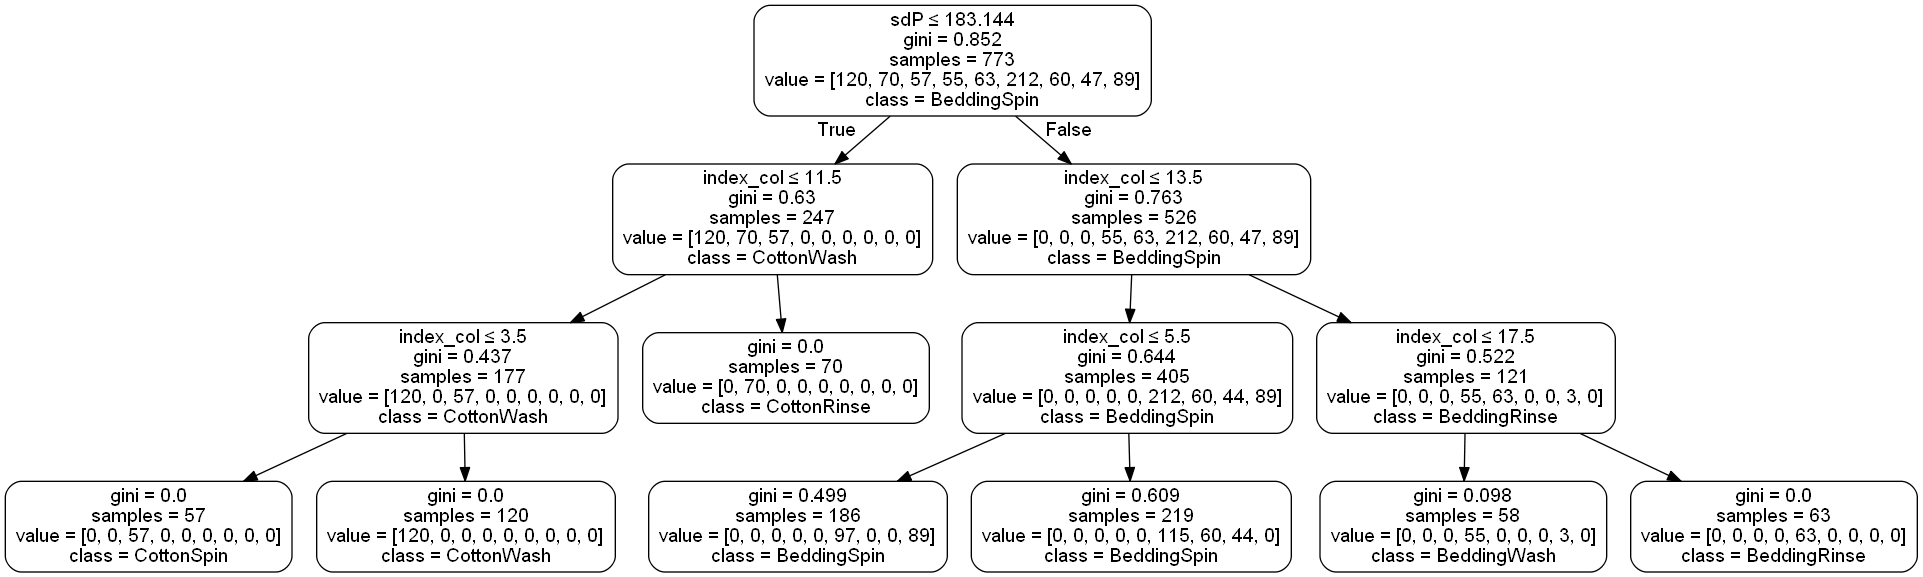

In [25]:
dot_data = StringIO()
export_graphviz(decision_tree=??, 
                out_file=dot_data,
                rounded=True,
                feature_names = X_train.columns, 
                class_names = ['CottonWash', 'CottonRinse', 'CottonSpin', 'BeddingWash', 'BeddingRinse', 'BeddingSpin',
                 'DailyWash', 'DailyRinse','DailySpin'],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


Next, print the 'proportions' by setting the parameter for $proportion=True$. 


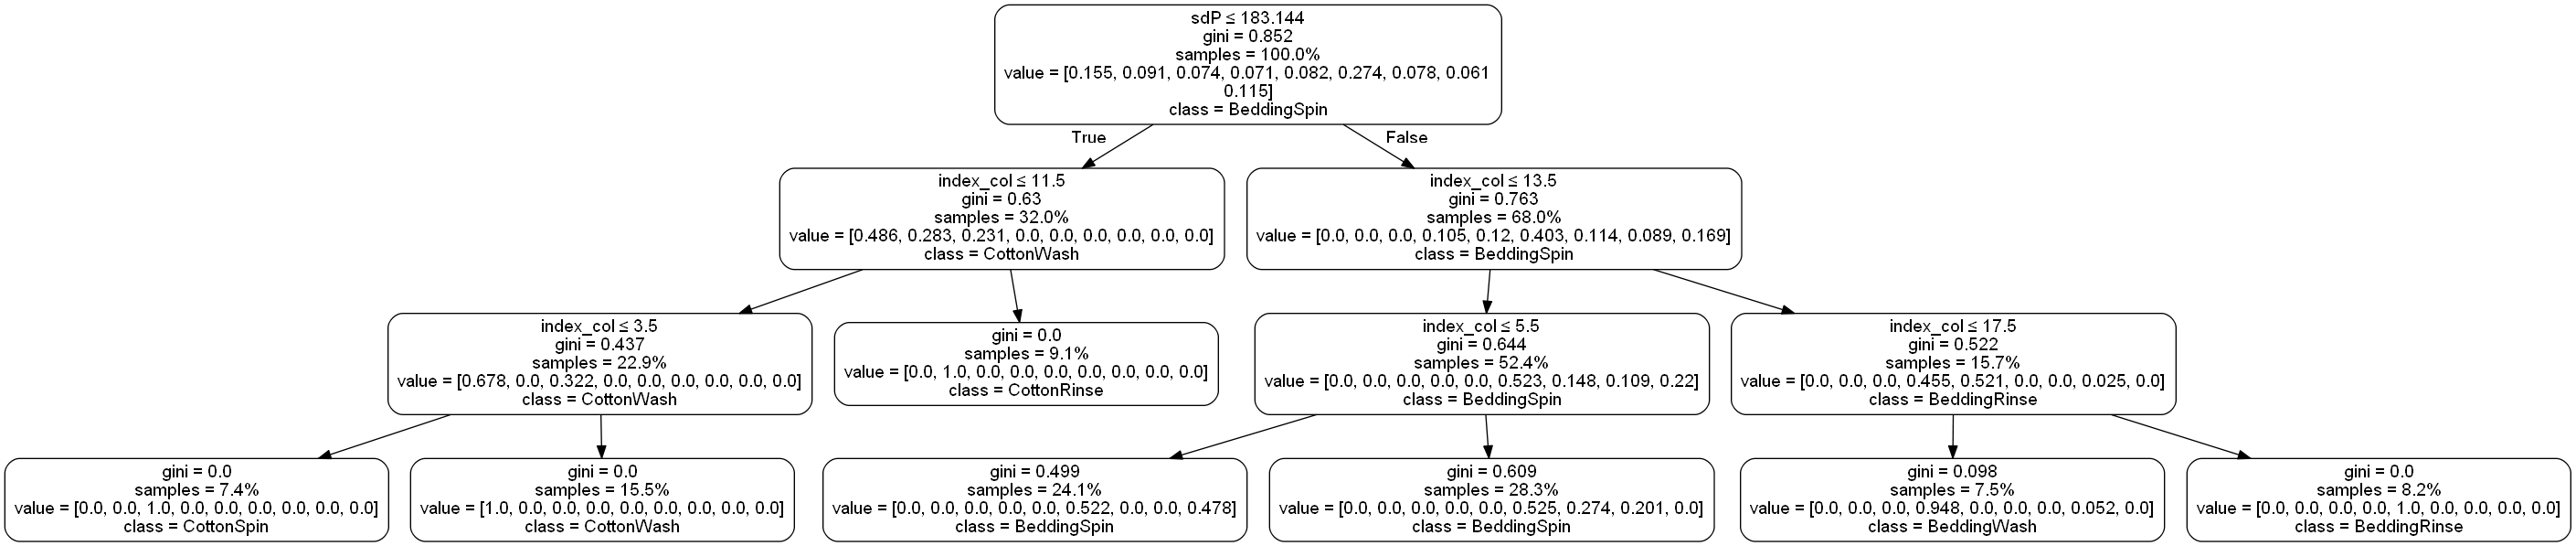

In [26]:
dot_data = StringIO()
export_graphviz(decision_tree=??, 
                out_file=dot_data,
                rounded=True,
                proportion=??,
                feature_names = X_train.columns, 
                class_names = ['CottonWash', 'CottonRinse', 'CottonSpin', 'BeddingWash', 'BeddingRinse', 'BeddingSpin',
                 'DailyWash', 'DailyRinse','DailySpin'],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


Has the tree structure changed? Are you getting a different result now? Explain your observation. 

...


## Training a Large Classification Tree

Let's train a larger tree by modifying the 'max_depth' to 6 and 'min_samples_split' to 50 in the scikit-learn parameters. You may also refer to https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html for other types of parameters.

In [27]:
class_tree = DecisionTreeClassifier(max_depth=??, min_samples_split=??)
class_tree.fit(??, ??)
y_pred_class_tree = class_tree.predict(??)


We can calculate the training accuracy score of this model as follows: 

In [28]:
from sklearn.metrics import accuracy_score 
accuracy_class_tree = accuracy_score(y_true=??, y_pred=??)
accuracy_class_tree


0.8913324708926261

We get 0.89133 or 89.1% accuracy for this $Decison Tree$ model by using the training data, which is much higher than the KNN model (81.4%). 


Another nice feature of this model is that we can get a normalizd score of "important" features by using the 'feature_importances_' method.

In [29]:
pd.Series(data=class_tree.feature_importances_, index=X_train.columns).sort_values(ascending=False).round(3)


index_col    0.651
sdP          0.183
maxC         0.059
maxP         0.055
AvRR         0.030
stdCP        0.010
avP          0.010
avC          0.001
sdC          0.000
avR          0.000
stdCR        0.000
dtype: float64

You can also compare these values using a bar graph.

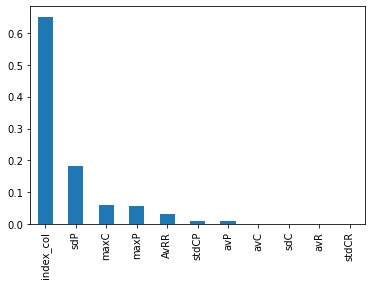

In [30]:
pd.Series(data=class_tree.feature_importances_, index=X_train.columns).sort_values(ascending=False).plot(kind='bar');


Discuss with your team what can you tell from these feature importance? 

Your response here ...



## Model Evaluation

### Confusion Matrix

Let's compute the confusion matrix for this Decision Tree model for the laudromat use case.


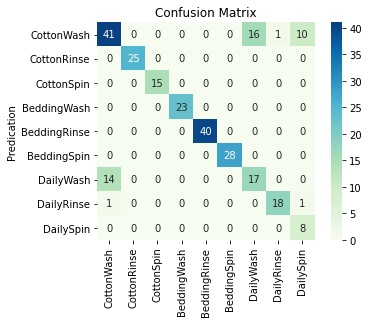

In [34]:
from sklearn.metrics import confusion_matrix

# Determine the accuracy of the model using test data
score = class_tree.score(??, ??)

# Provide the necessary label 
class_label=??

class_tree.fit(??, ??)
cm = confusion_matrix(y_test, class_tree.predict(??), labels=??)

axes = sns.heatmap(cm, square=True, annot=True, fmt ='d', cbar=True, cmap=plt.cm.GnBu)
axes.set_ylabel('Actual')
axes.set_ylabel('Predication')
tick_marks = np.arange(len(class_label)) + 0.5
axes.set_xticks(tick_marks)
axes.set_xticklabels(class_label, rotation = 90)
axes.set_yticks(tick_marks)
axes.set_yticklabels(class_label, rotation = 0)
axes.set_title('Confusion Matrix')
plt.show()


Let's calculate the accuracy, precision, recall and F1 Score for our Decision Tree model using the test dataset.


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class_tree = DecisionTreeClassifier(max_depth=??, min_samples_split=??) 
class_tree.fit(??, ??)

# Get prediction using test data
y_pred_test = class_tree.predict(??)

# Calculate the relevant metrics
accuracy = accuracy_score(??, ??)
precision = precision_score(??, ??, average='macro')
recall = recall_score(??, ??, average='macro')
f1 = f1_score(??, ??, average='macro')

print ("Accuracy: {:0.1f}%, Precision: {:0.1f}%, Recall: {:0.1f}%, F1 Score: {:0.1f}%".format(100*accuracy, 100* precision, 100*recall, 100*f1))


Accuracy: 83.3%, Precision: 84.6%, Recall: 89.5%, F1 Score: 85.6%


Are the accuracy, precision, recall and F1 Score for Decision Tree model better or worst then your KNN model? Explain. 


Your response here ...


Lastly, you may save your Decision Tree model for future comparison. 


In [36]:
import pickle as pk

model_filename= "./model/dt.mdl"
with open(model_filename, "wb") as file:
    pk.dump(??, file)
print("Model Saved") 


Model Saved


***